# Project that illustrates the amount of time required to file a patent with respect to the number of pages
Using Every Possible Regression method and comapring it's accuracy

In [1]:
# =============================================================================
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# =============================================================================

In [2]:
# =============================================================================
# Importing Data
dataset =pd.read_csv("D:/PGDA Files/Python/Project/Patent Project/projects.csv")
# =============================================================================

In [3]:
# =============================================================================
# Seperating the Dependant and Independant Variables
x = dataset.iloc[:,2:3].values
y = dataset.iloc[:,-1:].values
# =============================================================================

In [4]:
# =============================================================================
# Splitting training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=1,test_size=0.30)
# =============================================================================

[0.65464614]
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.808
Model:                            OLS   Adj. R-squared (uncentered):              0.806
Method:                 Least Squares   F-statistic:                              315.8
Date:                Sun, 22 Dec 2019   Prob (F-statistic):                    1.34e-28
Time:                        00:51:04   Log-Likelihood:                         -193.84
No. Observations:                  76   AIC:                                      389.7
Df Residuals:                      75   BIC:                                      392.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

Text(0.5, 1.0, 'Linear regression')

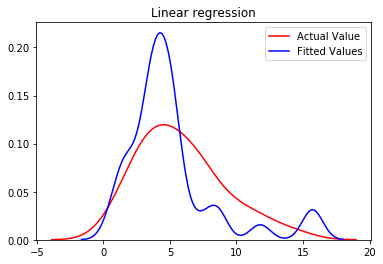

In [5]:
import statsmodels.api as sm
model1 = sm.OLS(y_train,x_train)
result1 = model1.fit() 
print(result1.params)
print(result1.summary())

# predicting the values
y_pred_lr=result1.predict(x_test)

#Visualization
import seaborn as sns
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred_lr, hist=False, color="b", label="Fitted Values" , ax=ax1).set_title('Linear regression')

mean_squared_error of polynomial regression is  8.165681409033414
R2 Score is 0.4594405552315344


Text(0.5, 1.0, 'Polynomial regression')

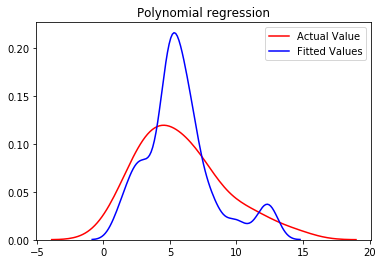

In [6]:
# =============================================================================
# Polynomial regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=5)
x_poly = poly_reg.fit_transform(x)
poly_reg.fit(x_poly,y)
line_reg_2=LinearRegression()
line_reg_2.fit(x_poly,y)

# Predicting the values
y_pred_polyreg=line_reg_2.predict(poly_reg.fit_transform(x))

# Checking it's mean_squared difference
from sklearn.metrics import mean_squared_error
mean_squared_error = mean_squared_error(y, y_pred_polyreg)
print("mean_squared_error of polynomial regression is ",mean_squared_error)

# Checking it's r-square value
from sklearn.metrics import r2_score
r2_score = r2_score(y, y_pred_polyreg)
print("R2 Score is",r2_score)

# Visualization
import seaborn as sns
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred_polyreg, hist=False, color="b", label="Fitted Values" , ax=ax1).set_title('Polynomial regression')
# =============================================================================

mean_squared_error for polynomial regression using svr is  11.073231669053545
r-square value for polynomial regression using svr is:  0.2669638131859572


D:\DataScienceSoftwares\Anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


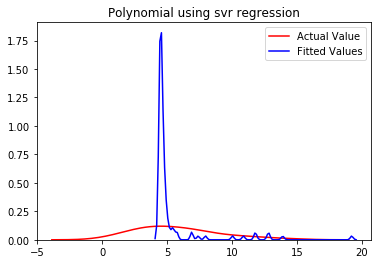

In [7]:
# =============================================================================
# Fitting SVR to the Dataset kernel=poly
from sklearn.svm import SVR
regressor_poly = SVR(kernel='poly',gamma='scale')
regressor_poly.fit(x,y)

# Predicting new result
y_pred_poly = regressor_poly.predict(x)

# Visualizing the SVR results
import seaborn as sns
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred_poly, hist=False, color="b", label="Fitted Values" , ax=ax1).set_title('Polynomial using svr regression')

# Checking it's mean_squared difference
from sklearn.metrics import mean_squared_error
mean_squared_error = mean_squared_error(y, y_pred_poly)
print("mean_squared_error for polynomial regression using svr is ",mean_squared_error)


#Checking the r-square value
rsquare=regressor_poly.score(x,y)
print("r-square value for polynomial regression using svr is: ",rsquare)
# =============================================================================

mean_squared_error for SVR 9.39377570409969
R-squared value for SVR is:  0.3781420160147162


D:\DataScienceSoftwares\Anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


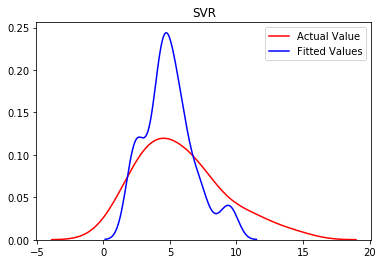

In [8]:
# =============================================================================
# Fitting SVR to the Dataset kernel=rbf
from sklearn.svm import SVR
regressor_rbf = SVR(kernel='rbf',gamma='scale')
regressor_rbf.fit(x,y)

# Predicting new result
y_pred_rbf = regressor_rbf.predict(x)

# Visualizing the SVR results
import seaborn as sns
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred_rbf, hist=False, color="b", label="Fitted Values" , ax=ax1).set_title('SVR')

# Checking it's mean_squared difference
from sklearn.metrics import mean_squared_error
mean_squared_error = mean_squared_error(y, y_pred_rbf)
print("mean_squared_error for SVR",mean_squared_error)

#Checking the r-square value
rsquaresv=regressor_rbf.score(x,y)
print("R-squared value for SVR is: ",rsquaresv)
# =============================================================================

D:\DataScienceSoftwares\Anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


mean_squared_error for linear regression using svr 8.845816638350893
R-squared value for linear regression using SVR is:  0.4144163247342966


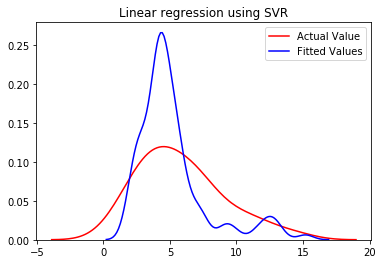

In [9]:
# =============================================================================
# Fitting SVR to the Dataset kernel = linear
from sklearn.svm import SVR
regressor_linear = SVR(kernel='linear')
regressor_linear.fit(x,y)

# Predicting new result
y_pred_linear = regressor_linear.predict(x)

# Visualizing the SVR results
import seaborn as sns
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred_linear, hist=False, color="b", label="Fitted Values" , ax=ax1).set_title('Linear regression using SVR')

# Checking it's mean_squared difference
from sklearn.metrics import mean_squared_error
mean_squared_error = mean_squared_error(y, y_pred_linear)
print("mean_squared_error for linear regression using svr",mean_squared_error)

#Checking the r-square value
rsquarelr=regressor_linear.score(x,y)
print("R-squared value for linear regression using SVR is: ",rsquarelr)
# =============================================================================

mean_squared_error for Decision Tree is 5.510824110204272
Rsquare value for Decision tree regression is:  0.6351892913758295


Text(0.5, 1.0, 'Decisiion Tree Regression')

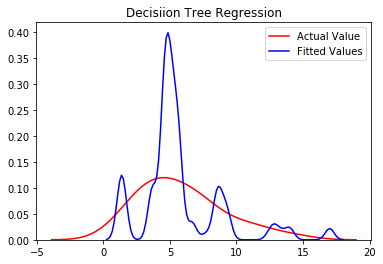

In [10]:
# =============================================================================
# Decision Tree Regression
#Building model
from sklearn.tree import DecisionTreeRegressor
reg_dt= DecisionTreeRegressor(random_state=1)
reg_dt.fit(x,y)

#Predicting the value
y_pred_dt=reg_dt.predict(x)

# Checking it's mean_squared difference
from sklearn.metrics import mean_squared_error
mean_squared_error = mean_squared_error(y, y_pred_dt)
print("mean_squared_error for Decision Tree is",mean_squared_error)

#Obtaining the r-squared score
DTscore=reg_dt.score(x,y)
print("Rsquare value for Decision tree regression is: ",DTscore)

#Visualizing
import seaborn as sns
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred_dt, hist=False, color="b", label="Fitted Values" , ax=ax1).set_title('Decisiion Tree Regression')
# =============================================================================

mean_squared_error for Random Fores 5.873786234895395
R-squred value of Random forest regression is : 0.611161583856165


D:\DataScienceSoftwares\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\DataScienceSoftwares\Anaconda\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Text(0.5, 1.0, 'Random Forest regression')

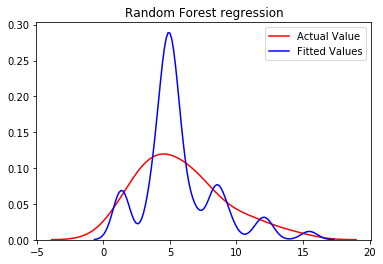

In [11]:
# =============================================================================
# Random forest regression
# Building the model
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor(max_depth=500, random_state=0)
reg_rf.fit(x, y)

# Predicting the value
y_pred_rf=reg_rf.predict(x)

# Checking it's mean_squared difference
from sklearn.metrics import mean_squared_error
mean_squared_error = mean_squared_error(y, y_pred_rf)
print("mean_squared_error for Random Fores",mean_squared_error)

# Obtaining the r-squared score
Rf_score=reg_rf.score(x,y)
print("R-squred value of Random forest regression is :",Rf_score)
#Visualizing
import seaborn as sns
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred_rf, hist=False, color="b", label="Fitted Values" , ax=ax1).set_title('Random Forest regression')
# =============================================================================